In [2]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt

#regression tools
import statsmodels.api as sm
from patsy import dmatrices

## Load Dataset

In [36]:
df_orig = pd.read_csv('dataset.csv')
df_orig.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


## Analysis

In [38]:
# convert date to timestamp object
df = df_orig.copy()
df['date'] = pd.to_datetime(top['date'], format = '%Y-%m-%d')

In [72]:
# group by date -> show avgs per month
grouped = df.copy()
grouped['date2'] = grouped['date'].dt.strftime('%Y-%m')
grouped = grouped.groupby('date2')[['energy', 'danceability', 'acousticness']].mean()
grouped.head()

,energy,danceability,acousticness
date2,,,
2017-01,0.611649,0.685028,0.202181
2017-02,0.608902,0.688805,0.205938
2017-03,0.595437,0.696631,0.204511
2017-04,0.599622,0.707780,0.174264
2017-05,0.602702,0.709444,0.172472


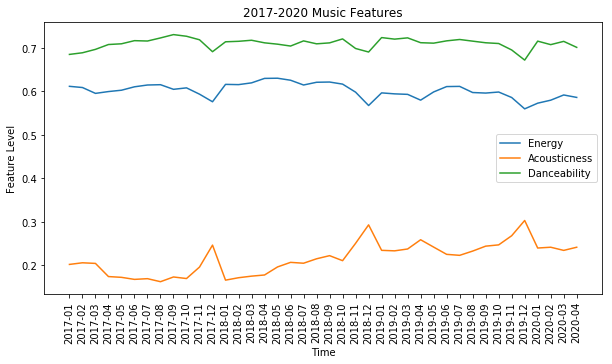

In [78]:
plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.legend()
plt.title('2017-2020 Music Features')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('Feature Level')
plt.show()

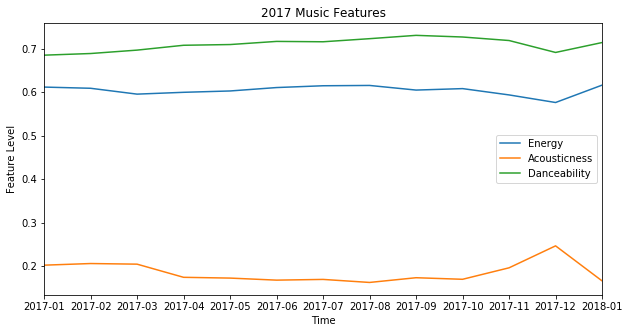

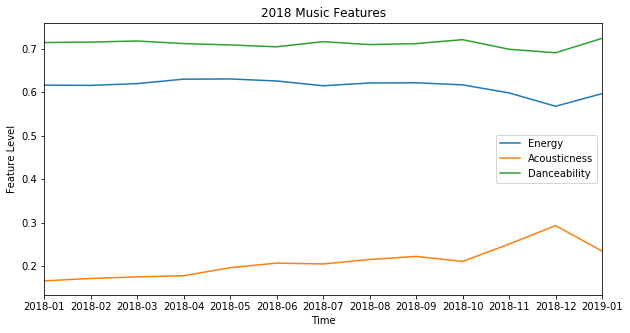

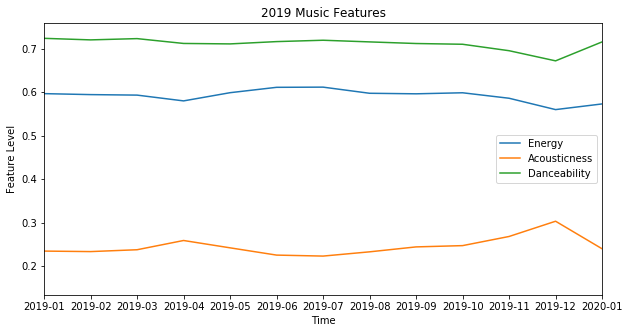

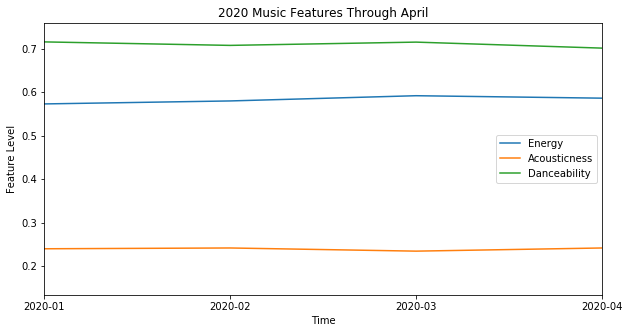

In [79]:
# plots by year

plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.xlim('2017-01', '2018-01')
plt.legend()
plt.title('2017 Music Features')
plt.xlabel('Time')
plt.ylabel('Feature Level')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.xlim('2018-01', '2019-01')
plt.legend()
plt.title('2018 Music Features')
plt.xlabel('Time')
plt.ylabel('Feature Level')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.xlim('2019-01', '2020-01')
plt.legend()
plt.title('2019 Music Features')
plt.xlabel('Time')
plt.ylabel('Feature Level')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(grouped.index, grouped['energy'], '-', label = 'Energy')
plt.plot(grouped.index, grouped['acousticness'], '-', label = 'Acousticness')
plt.plot(grouped.index, grouped['danceability'], '-', label = 'Danceability')
plt.xlim('2020-01', '2020-04')
plt.legend()
plt.title('2020 Music Features Through April')
plt.xlabel('Time')
plt.ylabel('Feature Level')
plt.show()